In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

amz_df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
amz_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [12]:
#PART 1
#Frequency Tables:
#1.Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?
#Generate a frequency table for the product category.
#Which are the top 5 most listed product categories?
frequency_table = amz_df['category'].value_counts().head(5)
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [ ]:
#The most popular product category is Sports & Outdoors based on the Amazon UK listing frequency, followed by Beauty,Handmade Clothing, Shoes & Accessories, Bath & Body and Birthday Gifts.  
#All this categories mentioned previously are th top 5 most listed product categories. Sports & Outdoors with a volume exceeding other categories.

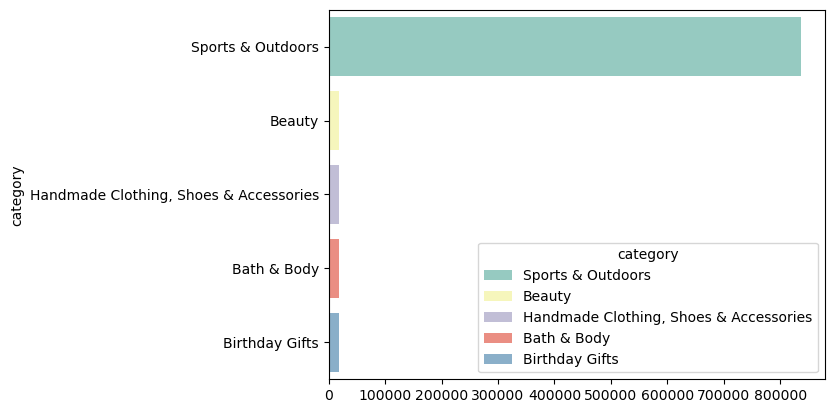

In [15]:
#2.Visualizations:
#Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
ax=sns.barplot(y=frequency_table.index, x=frequency_table.values, palette="Set3", hue=frequency_table.index, legend=True )
sns.move_legend(ax, "lower right")

In [26]:
#For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?
proportion_table = (frequency_table/frequency_table.sum()).round(2).head(5)
proportion_table

category
Sports & Outdoors                         0.92
Beauty                                    0.02
Handmade Clothing, Shoes & Accessories    0.02
Bath & Body                               0.02
Birthday Gifts                            0.02
Name: count, dtype: float64

In [ ]:
#The category dominating the listings is Sports & Outdoors.

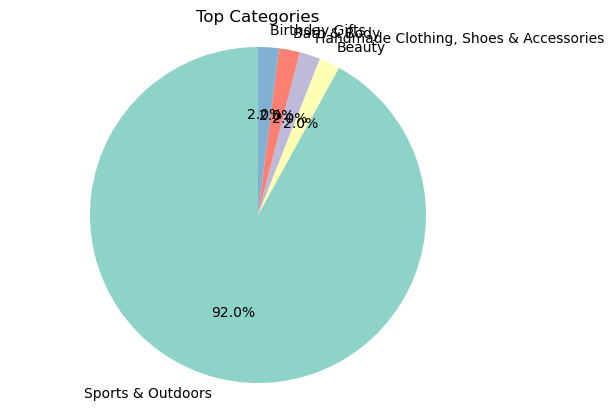

In [34]:
#pie chart
proportion_table.plot.pie(autopct='%.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title("Top Categories")
plt.ylabel('')  
plt.axis('equal') 
plt.show()

In [36]:
#PART 2
#Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?
#1.Measures of Centrality:
#Calculate the mean, median, and mode for the price of products.
#What's the average price point of products listed? How does this compare with the most common price point (mode)?
mean_price = amz_df['price'].mean()
median_price= amz_df['price'].median()
mode_price = amz_df['price'].mode()[0]

print(f"Mean: {mean_price}")
print(f"Median: {median_price}")
print(f"Mode: {mode_price}")

Mean: 89.24380943923663
Median: 19.09
Mode: 9.99


In [ ]:
#Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?
#Products on Amazon UK are mostly priced affordably, with common price points under £20.  But this calculation suggest that a small group of high value items raises the average, making the mean less representative of typical product prices.
#The average product price is 89.24, but this is much higher than both the median that is 19.09 and mode 9.99

In [44]:
#2.Measures of Dispersion:
#Determine the variance, standard deviation, range, and interquartile range for product price.
variance_price = amz_df['price'].var()
std_dev_price = amz_df['price'].std()
min_price = amz_df['price'].min()
max_price = amz_df['price'].max()
range_price = max_price - min_price
Q1_price = amz_df['price'].quantile(0.25)
Q3_price = amz_df['price'].quantile(0.75)
Interquartile_range = Q3_price - Q1_price

print(f"Variance: {variance_price}")
print(f"Std_Dev: {std_dev_price}")
print(f"Range: {range_price}")
print(f"Interquartile: {Interquartile_range}")

Variance: 119445.48532256528
Std_Dev: 345.60886175352226
Range: 100000.0
Interquartile: 36.0


In [ ]:
#How varied are the product prices? Are there any indicators of a significant spread in prices?
#The prices show significant variability.The standard deviation is 345.61 is extremely greater than the mean price, showing extreme price variability.
#The spread in prices, is mainly due to a small number of products that are extremely expensive.

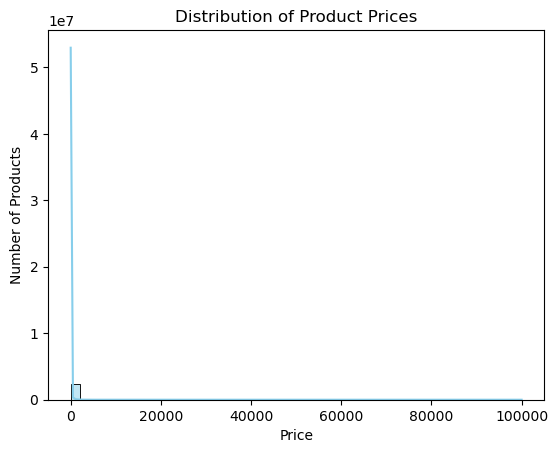

In [45]:
#3.Visualizations:
#Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
sns.histplot(amz_df['price'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.show()

In [ ]:
#Is there a specific price range where most products fall?
#most products fall within a low price range, but this is hard to see clearly due to extreme outliers.
#Maybe by filtering or adjusting the scale, it is going to visualize better the true distribution and see the price clusters clearly.

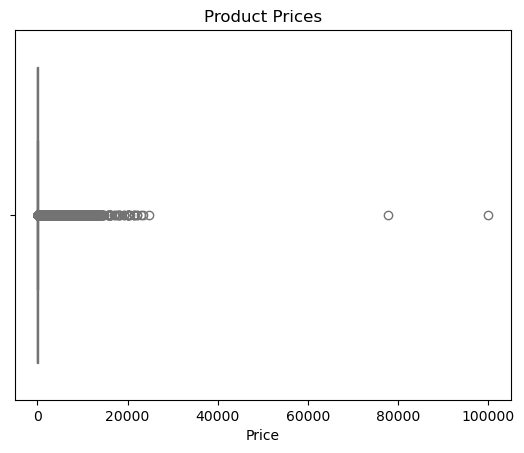

In [46]:
#Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.
sns.boxplot(x=amz_df['price'], color='lightgreen')
plt.title('Product Prices')
plt.xlabel('Price')
plt.show()

In [ ]:
#Are there products that are priced significantly higher than the rest?
#A few extreme outliers extend far to the right, with prices approaching 100,000, separate from the main data range, this is a clear indication of significantly higher prices than the rest.

In [49]:
#Part 3: Unpacking Product Ratings
#Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?
#1.Measures of Centrality:
#Calculate the mean, median, and mode for the rating of products.
#How do customers generally rate products? Is there a common trend?
mean_rating = amz_df['stars'].mean()
median_rating = amz_df['stars'].median()
mode_rating = amz_df['stars'].mode()[0]

print(f"Mean: {mean_rating}")
print(f"Median: {median_rating}")
print(f"Mode: {mode_rating}")

Mean: 2.152836472966065
Median: 0.0
Mode: 0.0


In [ ]:
#Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?
#How do customers generally rate products? Is there a common trend?
#The analysis shows most products have a rating of 0, likely due to missing or unrated entries, not necessarily bad ratings.

In [51]:
#2.Measures of Dispersion:
#Determine the variance, standard deviation, and interquartile range for product rating.
#Are the ratings consistent, or is there a wide variation in customer feedback?
variance_rating = amz_df['stars'].var()
std_dev_rating = amz_df['stars'].std()
Q1_rating = amz_df['stars'].quantile(0.25)
Q3_rating = amz_df['stars'].quantile(0.75)
Interquartile_range_rating = Q3_rating - Q1_rating

print(f"Variance: {variance_rating}")
print(f"Std_Dev: {std_dev_rating}")
print(f"Interquartile: {Interquartile_range_rating}")

Variance: 4.81743402976196
Std_Dev: 2.1948653785054697
Interquartile: 4.4


In [ ]:
#Are the ratings consistent, or is there a wide variation in customer feedback?
#The rating are no consistent, vary a lot, wide variation in customer feedback.

In [18]:
#3.Shape of the Distribution:
#Calculate the skewness and kurtosis for the rating column.
#Are the ratings normally distributed, or do they lean towards higher or lower values?
skewness_price = amz_df['stars'].skew()
kurtosis_price = amz_df['stars'].kurtosis()

print(f"Skewness: {skewness_price}")
print(f"Kurtosis: {kurtosis_price}")

Skewness: 0.08120735761080985
Kurtosis: -1.9260061280432985


In [ ]:
#Skewness: 0.081, this means the ratings distribution is roughly symmetric, the is no strong lean towards higher or lower values.
#Kurtosis: -1.926, indicates a flatter distribution than a normal bell curve

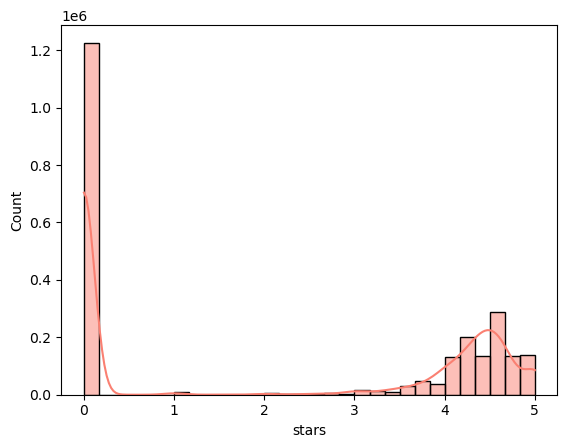

In [25]:
#4.Visualizations:
#Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?
fig, axes = plt.subplots()
sns.histplot(amz_df['stars'], kde=True, bins=30, color="salmon", ax=axes);
plt.show()